# Prevendo Preços de Voos Aéreos com Regressão Linear

![](https://images.unsplash.com/photo-1483450388369-9ed95738483c?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

## 1.1. O contexto

O objetivo desse projeto é analisar o dataset de reservas de voos obtido do site indiano "Easy My Trip" e conduzir dois processos: uma Análise Exploratória de Dados e a criação de um modelo de previsão dos preços de passagens. O site é uma plataforma para realizar reservas de voos e comprar passagens, através desse estudo vamos buscar insights para que está planejando uma viagem.

Portando também iremos responder algumas perguntas: 
1. Preço varia de acordo com a Linha Aérea? e com a Classe?
2. Como os preços das passagens são afetados, entre 1 e 2 dias antes da viagem?
3. O preço muda de acordo com o período do dia para chegada e partida?
4. O preço muda de acordo com o destino de partida e chegada?

## 1.2. A estrutura do conjunto de dados

A colunas do conjunto de dados estão organizadas da seguinte forma:

|Coluna|Descrição|
|-------|---------|
|airline|A linha aérea do voo|
|flight|O código de identificação do voo|
|source_city|A cidade de onde o voo está partindo|
|departure_time|Período do dia em qual o voo partiu|
|stops|Número de paradas entre a partida e o destino|
|arrival_time|Período do dia em que o voo chegou|
|destination_city|A cidade destino do voo|
|class|Classe do voo|
|duration|Duração em horas do voo|
|days_left|Diferença entre o dia da viagem e da reserva|
|price|Preço da passagem|

## 1.3. Importando as bibliotecas e carregando o dataset

In [71]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Análise Exploratória de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações do notebook
import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')
my_palette = sns.color_palette(["#023E8A", "#0077B6", "#0096C7", "#00B4D8", "#48CAE4", "#90E0EF", "#ADE8F4", "#CAF0F8"])
sns.set_palette(my_palette)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)

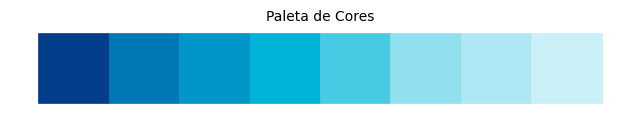

In [72]:
plt.figure(figsize=(8, 1))

for i, cor in enumerate(my_palette):
    plt.fill_between([i, i + 1], 0, 1, color=cor)

plt.axis('off')
plt.title('Paleta de Cores', fontsize = 10)
plt.show()

In [73]:
df = pd.read_csv("../data/raw/Clean_Dataset.csv")
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

# 2. Visão geral dos dados

## 2.1. Estrutura

In [74]:
df.shape

(300153, 11)

In [75]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [77]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.22,7.19,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.00,13.56,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.66,22697.77,1105.00,4783.00,7425.00,42521.00,123071.00


#### Sobre a estrutura

O dataset tem 11 colunas, apenas 3 delas são numéricas. Os tipos dos dados estão corretamente preenchidos mas existe um grande desequilibrio nas distribuições, a média de preços das passagens é aproximadamente 20000 INR(Rupias indianas) e a mediana está em 7400 o que aponta para existência de valores extremos (outliers). A duração dos voos e os dias até a viagem estão aparentam uma melhor distribuição.

## 2.2. Limpeza e manipulação

### Nulos e duplicados

In [78]:
print(f'O dataset tem {df.isnull().sum().sum()} dados nulos.')

O dataset tem 0 dados nulos.


In [79]:
print(f'O dataset tem {df.duplicated().sum()} dados nulos.')

O dataset tem 0 dados nulos.


### Outliers

#### Price

Vamos buscar entender a distribuição de 'price' visualmente

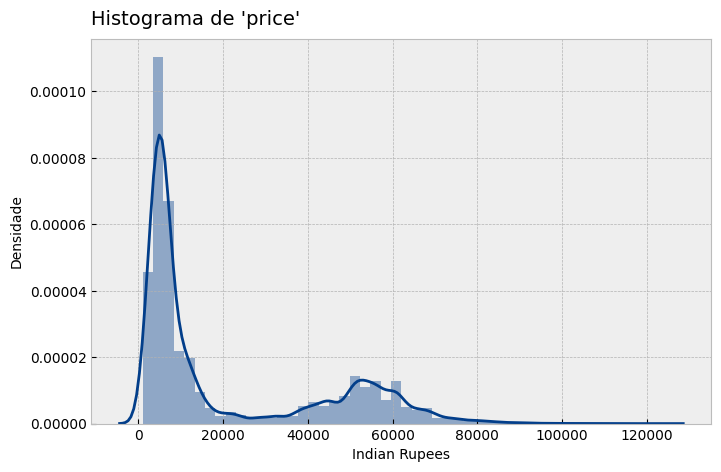

In [80]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.distplot(df['price'])
ax.set_title("Histograma de 'price'", loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Indian Rupees", fontsize = 10)
ax.set_ylabel("Densidade", fontsize = 10)
fig.savefig("../doc/img/plot1.png")
plt.show()

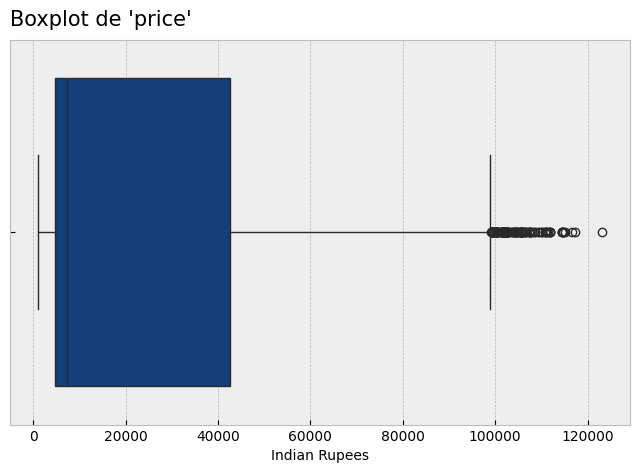

In [111]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.boxplot(x = df['price'])
ax.set_title("Boxplot de 'price'", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Indian Rupees", fontsize = 10)
fig.savefig("../doc/img/plot2.png")
plt.show()

Existe uma assimétria a direita nos dados e será necessária a remoção dos outliers.

In [82]:
# Definindo o intervalo interquartil
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites
lim_superior = Q3 + 1.5 * IQR
lim_inferior = Q1 - 1.5 * IQR

# Dados sem outliers
df_clean = df[(df['price'] > lim_inferior) & (df['price'] < lim_superior)].copy()
df_clean.reset_index()
df_clean.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Agora vamos visualizar o boxplot após a remoção dos dados extremos.

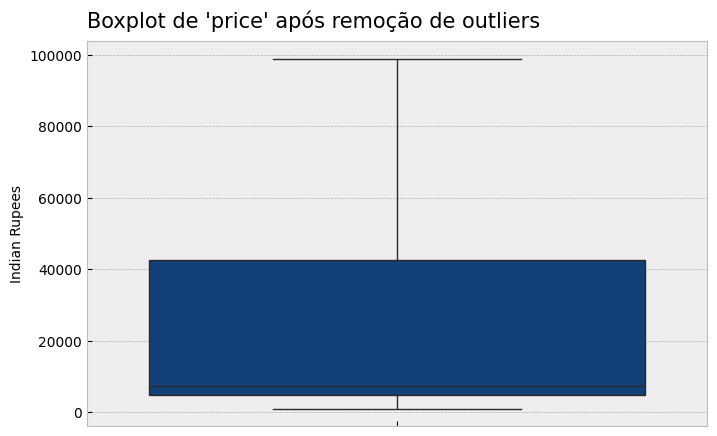

In [83]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.boxplot(df_clean['price'])
ax.set_title("Boxplot de 'price' após remoção de outliers", loc = 'left', fontsize = 15, pad = 10)
ax.set_ylabel("Indian Rupees", fontsize = 10)
fig.savefig("../doc/img/plot3.png")
plt.show()

#### Duration

Vamos prosseguir com o mesmo procedimento para as outras variáveis numéricas. 

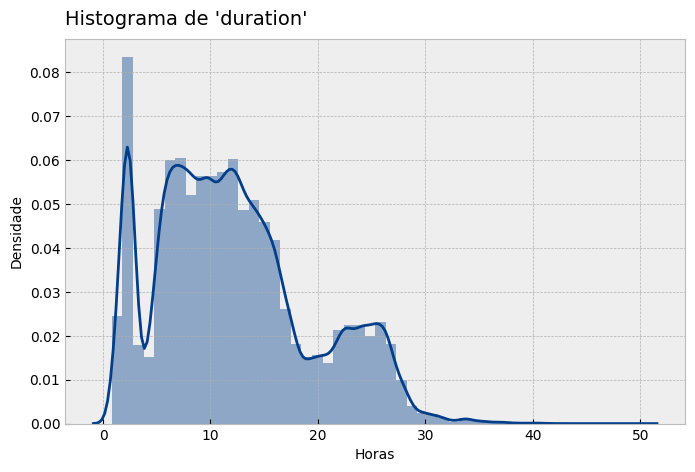

In [84]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.distplot(df_clean['duration'])
ax.set_title("Histograma de 'duration'", loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Horas", fontsize = 10)
ax.set_ylabel("Densidade", fontsize = 10)
fig.savefig("../doc/img/plot4.png")
plt.show()

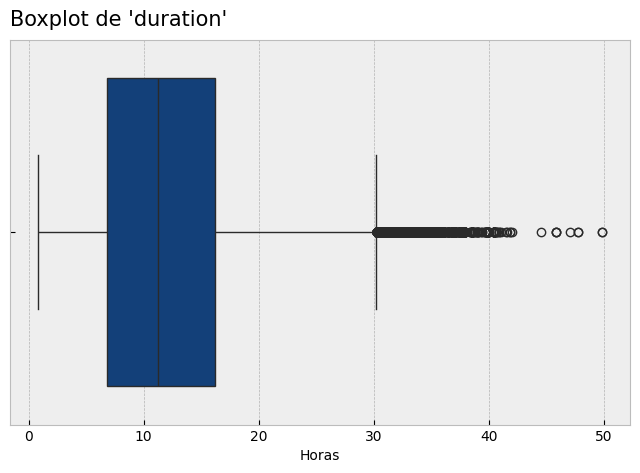

In [85]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.boxplot(x= df_clean['duration'])
ax.set_title("Boxplot de 'duration'", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Horas", fontsize = 10)
fig.savefig("../doc/img/plot5.png")
plt.show()

Aqui os dados também apresentam uma assimétria, e a necessidade da remoção de valores extremos

In [86]:
# Definindo o intervalo interquartil
Q1 = df_clean['duration'].quantile(0.25)
Q3 = df_clean['duration'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites
lim_superior = Q3 + 1.5 * IQR
lim_inferior = Q1 - 1.5 * IQR

# Dados sem outliers
df_clean = df_clean[(df_clean['duration'] > lim_inferior) & (df_clean['duration'] < lim_superior)].copy()
df_clean.reset_index()
df_clean.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


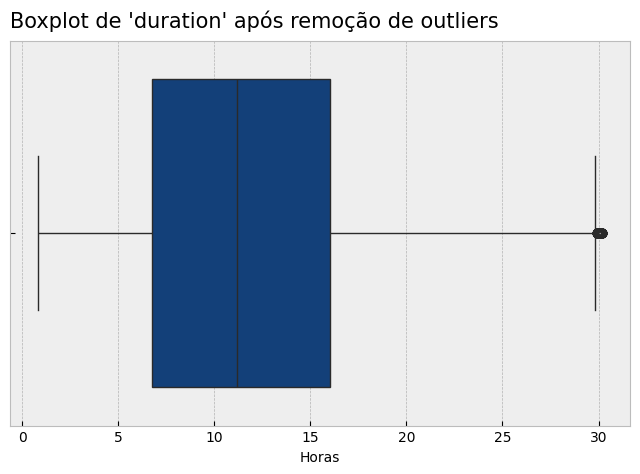

In [87]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.boxplot(x= df_clean['duration'])
ax.set_title("Boxplot de 'duration' após remoção de outliers", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Horas", fontsize = 10)
fig.savefig("../doc/img/plot6.png")
plt.show()

#### Days Left

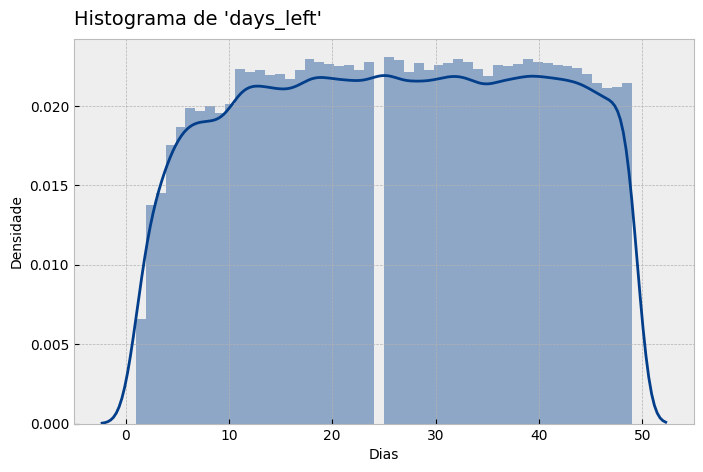

In [88]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.distplot(df_clean['days_left'])
ax.set_title("Histograma de 'days_left'", loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Dias", fontsize = 10)
ax.set_ylabel("Densidade", fontsize = 10)
fig.savefig("../doc/img/plot7.png")
plt.show()

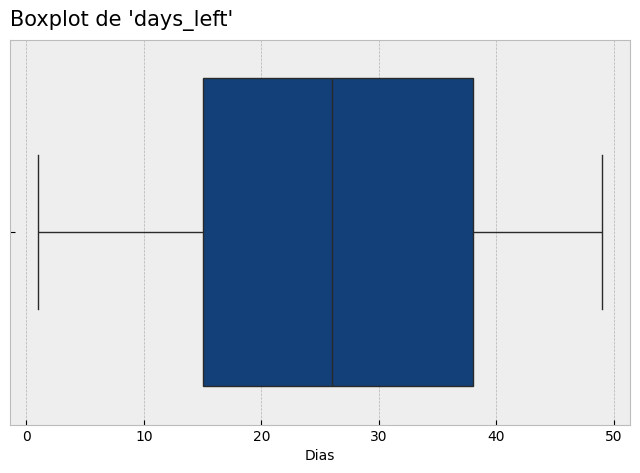

In [89]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.boxplot(x= df_clean['days_left'])
ax.set_title("Boxplot de 'days_left'", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Dias", fontsize = 10)
fig.savefig("../doc/img/plot8.png")
plt.show()

Days Left não possui outliers

# 3. Análise Exploratória de Dados

## 3.1. Preço varia de acordo com a Linha Aérea? e com a Classe?

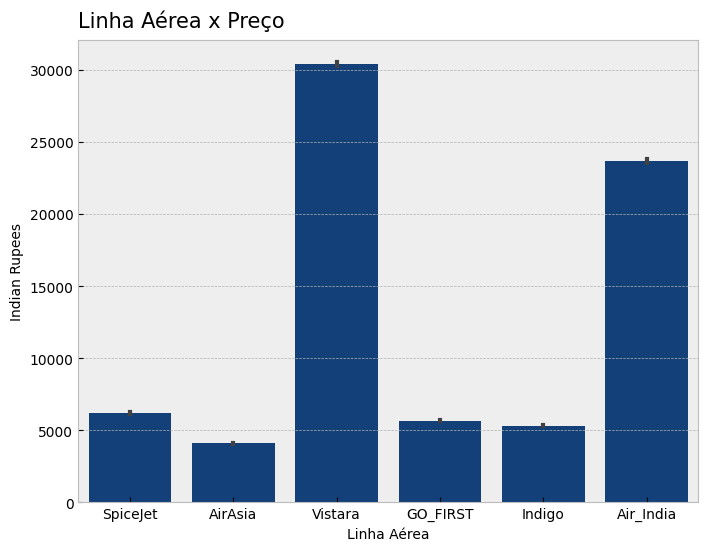

In [112]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(df_clean, x = 'airline', y = 'price')
ax.set_title("Linha Aérea x Preço", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Linha Aérea", fontsize = 10)
ax.set_ylabel("Indian Rupees", fontsize = 10)
fig.savefig("../doc/img/plot9.png")
plt.show()

Vistara e Air India tem preços de passagens mais caras que o restante das linhas aéreas. O restante tem preço parecido mas existe a linha área define bastante o preço. Vamos olhar sob o prisma da classe também.

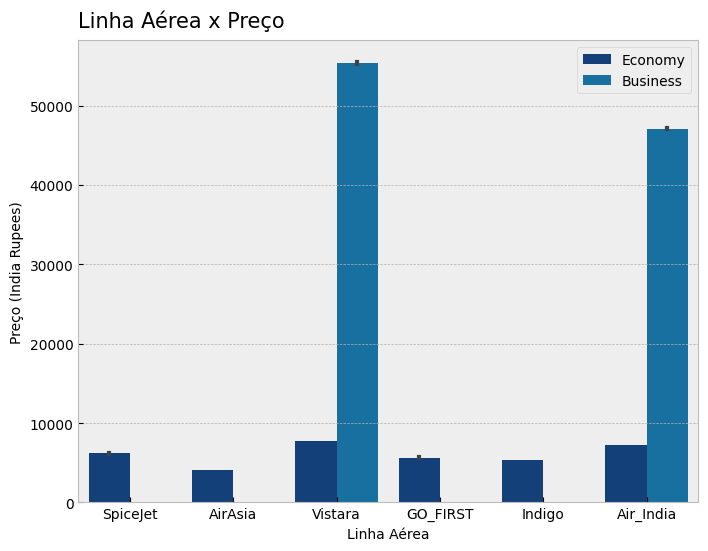

In [92]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(df_clean, x = 'airline', y = 'price', hue = 'class')
ax.set_title("Linha Aérea x Preço", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Linha Aérea", fontsize = 10)
ax.set_ylabel("Preço (India Rupees)", fontsize = 10)
plt.legend()
fig.savefig("../doc/img/plot10.png")
plt.show()

## 3.2. Como os preços das passagens são afetados, entre 1 e 2 dias antes da viagem?

In [93]:
def maior(i):
    if i > 2:
        return 'Mais que 2 dias'
    else:
        return 'Menos de 2 dias'

In [94]:
df_clean['days'] = df['days_left'].apply(maior)
df_clean.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,days
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Menos de 2 dias
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Menos de 2 dias
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Menos de 2 dias
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Menos de 2 dias
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Menos de 2 dias


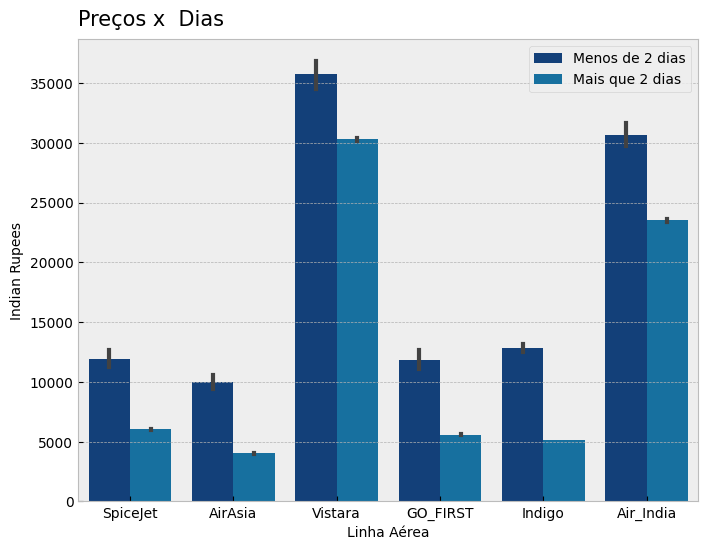

In [113]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(df_clean, x = 'airline', y = 'price', hue = 'days')
ax.set_title("Preços x  Dias", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Linha Aérea", fontsize = 10)
ax.set_ylabel("Indian Rupees", fontsize = 10)
plt.legend()
fig.savefig("../doc/img/plot11.png")
plt.show()

Passagens quando são compras com maior antecedência são mais baratas. 

## 3.3. O preço muda de acordo com o período do dia para chegada e partida?

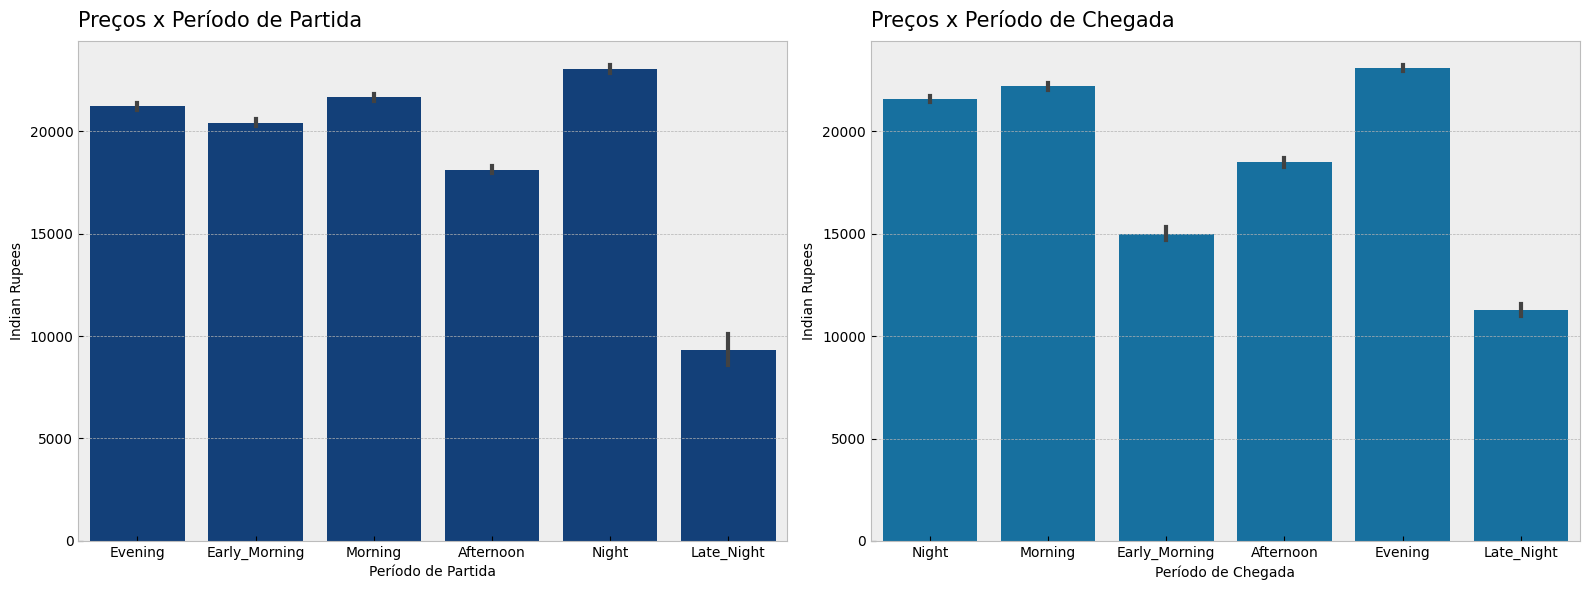

In [114]:
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

sns.barplot(ax = axes[0], data = df_clean, x ='departure_time', y = 'price')
axes[0].set_title("Preços x Período de Partida", loc = 'left', fontsize = 15, pad = 10)
axes[0].set_xlabel("Período de Partida", fontsize = 10)
axes[0].set_ylabel("Indian Rupees", fontsize = 10)

sns.barplot(ax = axes[1], data = df_clean, x = 'arrival_time', y = 'price', color = "#0077B6")
axes[1].set_title("Preços x Período de Chegada", loc = 'left', fontsize = 15, pad = 10)
axes[1].set_xlabel("Período de Chegada", fontsize = 10)
axes[1].set_ylabel("Indian Rupees", fontsize = 10)

plt.tight_layout()

fig.savefig("../doc/img/plot12.png")
plt.show()

A madrugada também é o melhor período para comprar passagens de chegada. Se tornando o período ideal para comprar passagens seguido pela tarde e o começo da manhã.

## 3.4. O preço muda de acordo com o destino de partida e chegada?

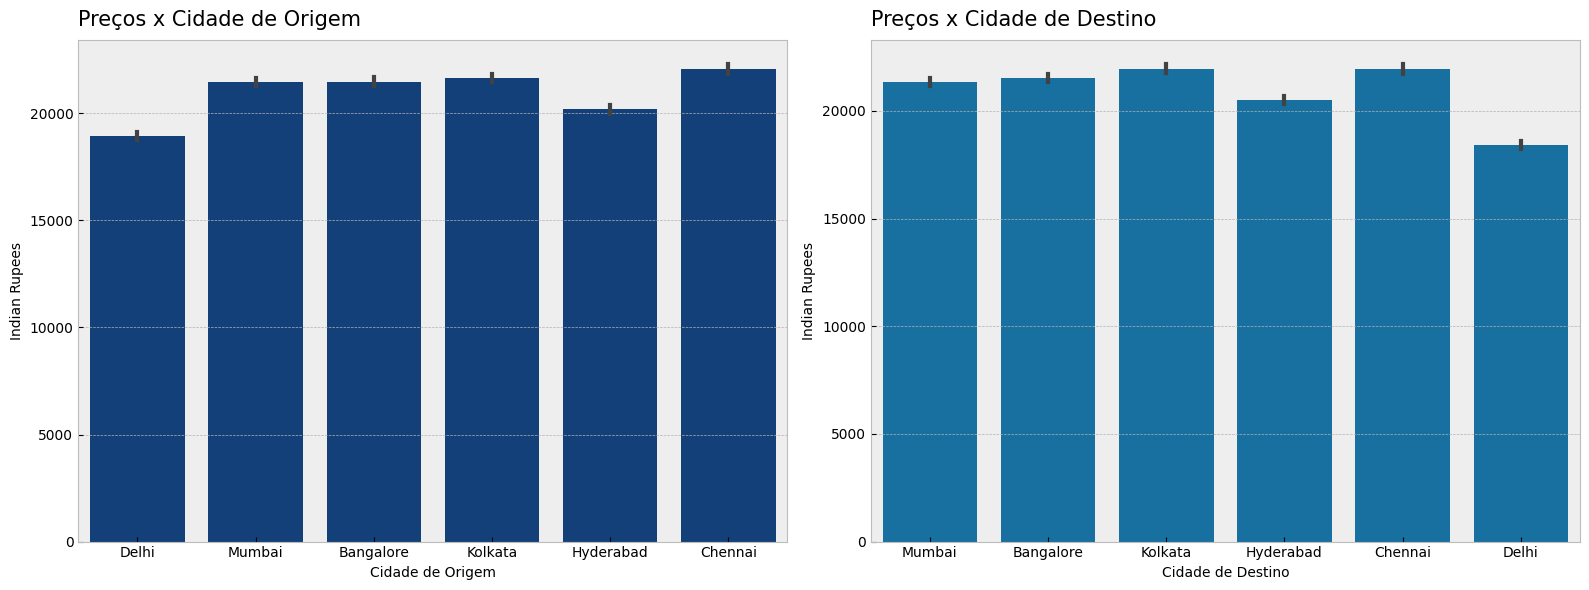

In [115]:
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

sns.barplot(ax = axes[0], data = df_clean, x = 'source_city', y = 'price')
axes[0].set_title("Preços x Cidade de Origem", loc = 'left', fontsize = 15, pad = 10)
axes[0].set_xlabel("Cidade de Origem", fontsize = 10)
axes[0].set_ylabel("Indian Rupees", fontsize = 10)

sns.barplot(ax = axes[1], data = df_clean, x = 'destination_city', y = 'price', color = "#0077B6")
axes[1].set_title("Preços x Cidade de Destino", loc = 'left', fontsize = 15, pad = 10)
axes[1].set_xlabel("Cidade de Destino", fontsize = 10)
axes[1].set_ylabel("Indian Rupees", fontsize = 10)

plt.tight_layout()

fig.savefig("../doc/img/plot13.png")
plt.show()

Sim, os pontos de partida e destino tem influência no preço. Delhi é o destino mais barato, seguido por Hyderabad. 

![](https://images.unsplash.com/photo-1504150558240-0b4fd8946624?q=80&w=1964&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

# 4. Modelo de Previsão

## 4.1. Pré-processamento dos dados

In [99]:
df_modelo = df_clean.drop(columns = ['flight', 'days'], axis = 1)
df_modelo.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [100]:
variaveis_num = df_modelo.select_dtypes(include='number').columns.to_list()
variaveis_cat = df_modelo.select_dtypes(exclude = 'number').columns.to_list()
print(variaveis_num)
print(variaveis_cat)

['duration', 'days_left', 'price']
['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [101]:
from feature_engine import encoding

onehot = encoding.OneHotEncoder(variables = variaveis_cat)
onehot.fit(df_modelo)
df_modelo = onehot.transform(df_modelo)
df_modelo.head()

,duration,days_left,price,airline_SpiceJet,airline_AirAsia,airline_Vistara,airline_GO_FIRST,airline_Indigo,airline_Air_India,source_city_Delhi,source_city_Mumbai,source_city_Bangalore,source_city_Kolkata,source_city_Hyderabad,source_city_Chennai,departure_time_Evening,departure_time_Early_Morning,departure_time_Morning,departure_time_Afternoon,departure_time_Night,departure_time_Late_Night,stops_zero,stops_one,stops_two_or_more,arrival_time_Night,arrival_time_Morning,arrival_time_Early_Morning,arrival_time_Afternoon,arrival_time_Evening,arrival_time_Late_Night,destination_city_Mumbai,destination_city_Bangalore,destination_city_Kolkata,destination_city_Hyderabad,destination_city_Chennai,destination_city_Delhi,class_Economy,class_Business
0,2.17,1,5953,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,2.33,1,5953,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,2.17,1,5956,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,2.25,1,5955,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4,2.33,1,5955,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


## 4.2. Usando o XGBRegressor

### Dividindo os dados

In [102]:
X = df_modelo.drop(columns = 'price', axis = 1)
y = df_modelo['price']

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((238336, 37), (59584, 37), (238336,), (59584,))

### Aplicando o modelo

In [105]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [107]:
y_pred = xgb.predict(X_test)
y_pred

array([ 5231.553 ,  4685.399 ,  5661.149 , ..., 56494.56  , 66620.336 ,
       12210.0625], dtype=float32)

## 4.3. Métricas 

In [108]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Métricas do Modelo")
print("=" * 40)
print(f"Mean Squared Error: {mse.round(4)}")
print(f"R² Score: {r2.round(4)}")

Métricas do Modelo
Mean Squared Error: 11433028.9639
R² Score: 0.9778


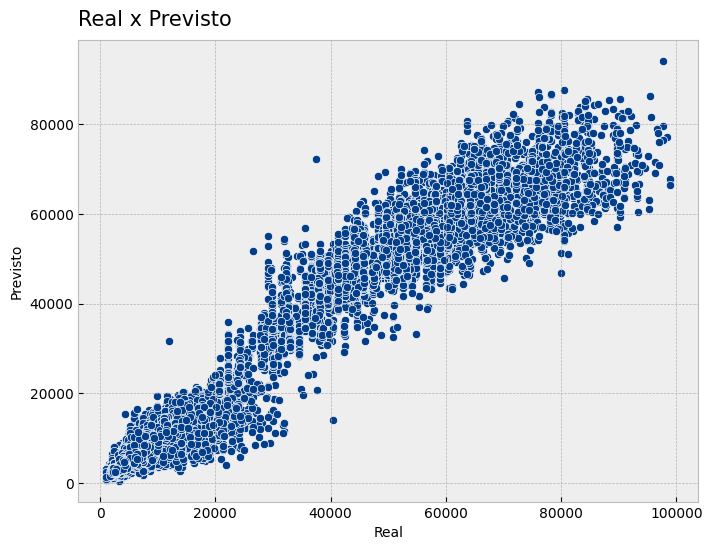

In [109]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.scatterplot(x = y_test, y = y_pred)
ax.set_title("Real x Previsto", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Real", fontsize = 10)
ax.set_ylabel("Previsto", fontsize = 10)
fig.savefig("../doc/img/plot14.png")
plt.show()

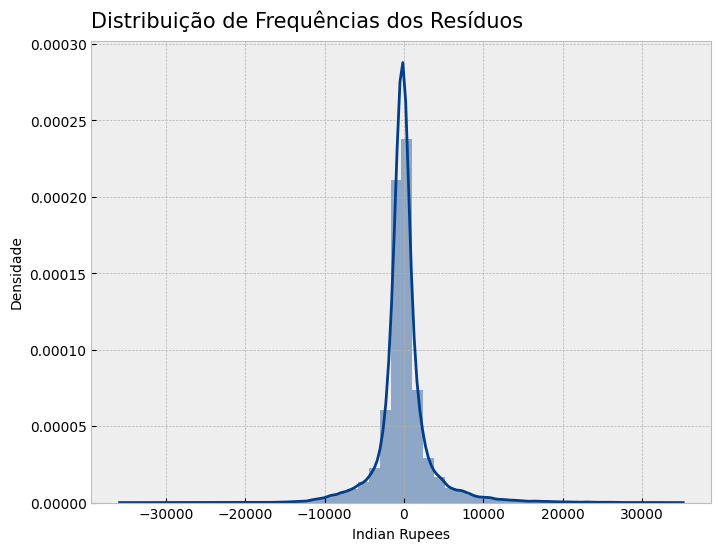

In [110]:
residuo = y_test - y_pred
fig, ax = plt.subplots(figsize = (8, 6))

sns.distplot(residuo, kde = True)
ax.set_title("Distribuição de Frequências dos Resíduos", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Indian Rupees", fontsize = 10)
ax.set_ylabel("Densidade", fontsize = 10)
fig.savefig("../doc/img/plot15.png")
plt.show()

# 5. Conclusões

### Respondendo as perguntas iniciais

1. As companhias aéreas com maior valor de passagem são a Vistara e Air India, o que é natural já que são as únicas que oferecem voos de classe executiva, sendo esses os voos com passagens mais caras.
2. Comprar passagens com antecedência vai trazer melhores ofertas nos preços,quanto mais próxima ao voo mais cara é a passagem.
3. Viajar de madrugada e cedo na manhã é mais barato que em outros períodos do dia.
4. Delhi e Hyderabad são os destinos de viagem mais baratos no conjunto de dados, e Chennai o destino mais caro.

### Sobre o modelo

Com a utilização do algoritmo XGBRegressor conseguimos uma ótima métrica de coeficiente de determinação, em 0.97, com a aplicação deste modelo será possível prever com segurança os preços de passagens aéreas. 